In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [2]:
iris_set = datasets.load_iris()
iris_data = pd.DataFrame(iris_set.data, columns=iris_set.feature_names)
iris_data["species"] = iris_set.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris_data.shape

(150, 5)

In [4]:
iris_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [5]:
#How many data points for each class are present?
iris_data["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [6]:
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [7]:
sns.set_style("darkgrid")

<AxesSubplot:title={'center':'Sepal Dimensions'}, xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

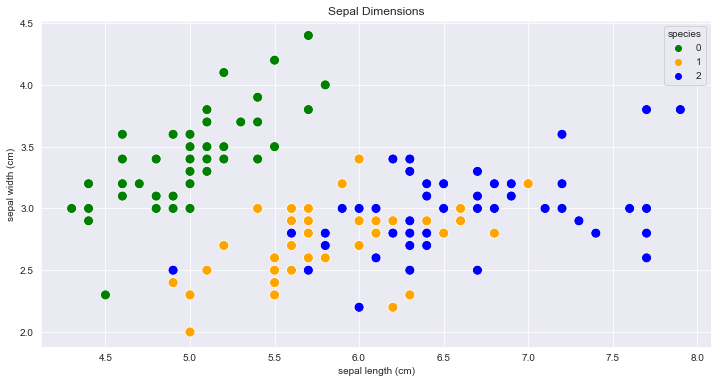

In [8]:
plt.figure(figsize=(12,6))
plt.title('Sepal Dimensions')
sns.scatterplot(x=iris_data["sepal length (cm)"],
               y=iris_data["sepal width (cm)"],
               hue=iris_data["species"],palette= ["green","orange","blue"],s=100)

The plt gives information the species "0" has small sepal length and large sepal width and where species "2" has large sepal length and small sepal width. In some cases it is very difficult is classify species "1" and species "2" they almost have same sepal dimentions. Here it is easy to seperate species "0" from the other species with linear boundary, but it is not possible to seperate species "1" and "2" with linear boundary and hence requires complex boundary for seperaton

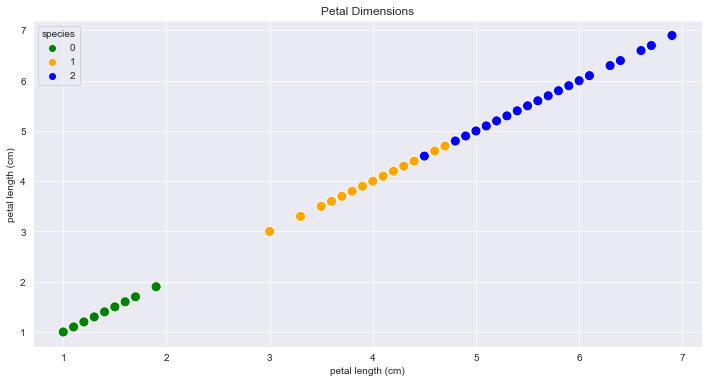

In [9]:
plt.figure(figsize=(12,6))
plt.title('Petal Dimensions')

sns.scatterplot(x=iris_data["petal length (cm)"],
               y=iris_data["petal length (cm)"],
               hue= iris_data["species"],palette=["green","orange","blue"],
               s=100);


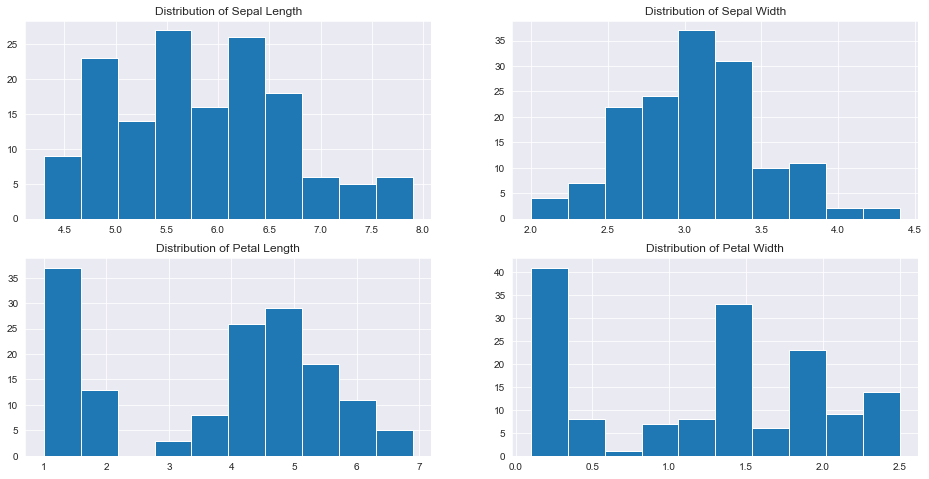

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

#plot for sepal length
axes[0,0].set_title('Distribution of Sepal Length')
axes[0,0].hist(iris_data["sepal length (cm)"]);

#plot for sepal width
axes[0,1].set_title('Distribution of Sepal Width')
axes[0,1].hist(iris_data["sepal width (cm)"]);

#plot for petal length
axes[1,0].set_title('Distribution of Petal Length')
axes[1,0].hist(iris_data["petal length (cm)"]); 

#plot for petal width
axes[1,1].set_title('Distribution of Petal Width')
axes[1,1].hist(iris_data["petal width (cm)"]);

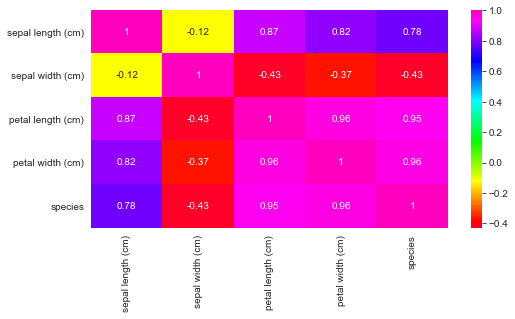

In [11]:
#The plot insightes that Petal width and length are highly correlated, while the sepal length and width are not correlated.
plt.figure(figsize=(8,4))
sns.heatmap(iris_data.corr(), annot=True, cmap='gist_rainbow');

The plot insightes that Petal width and length are highly correlated, while the sepal length and width are not correlated.

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris_data, test_size = 0.2)

In [13]:
train.shape, test.shape

((120, 5), (30, 5))

In [14]:
iris_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [15]:
train_x = train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
train_y = train.species
test_x = test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
test_y = test.species

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [17]:
dtree = DecisionTreeClassifier()
dtree.fit(train_x,train_y)
predictions = dtree.predict(test_x)
print("The accuracy of Decision Tree is:", metrics.accuracy_score(predictions, test_y))

The accuracy of Decision Tree is: 0.9


Test accuracy is 96%, hence we can now fit the model for entire data and test for the new data.

In [18]:
X = iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
Y = iris_data.species

In [19]:
dtree1 = DecisionTreeClassifier()
dtree1.fit(X,Y)
print("Decision Tree Classifier is created")

Decision Tree Classifier is created


Let us visualize the Decision Tree to understand it better

In [20]:
# Install required libraries
#!pip install pydotplus
#!apt-get install graphviz -y

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


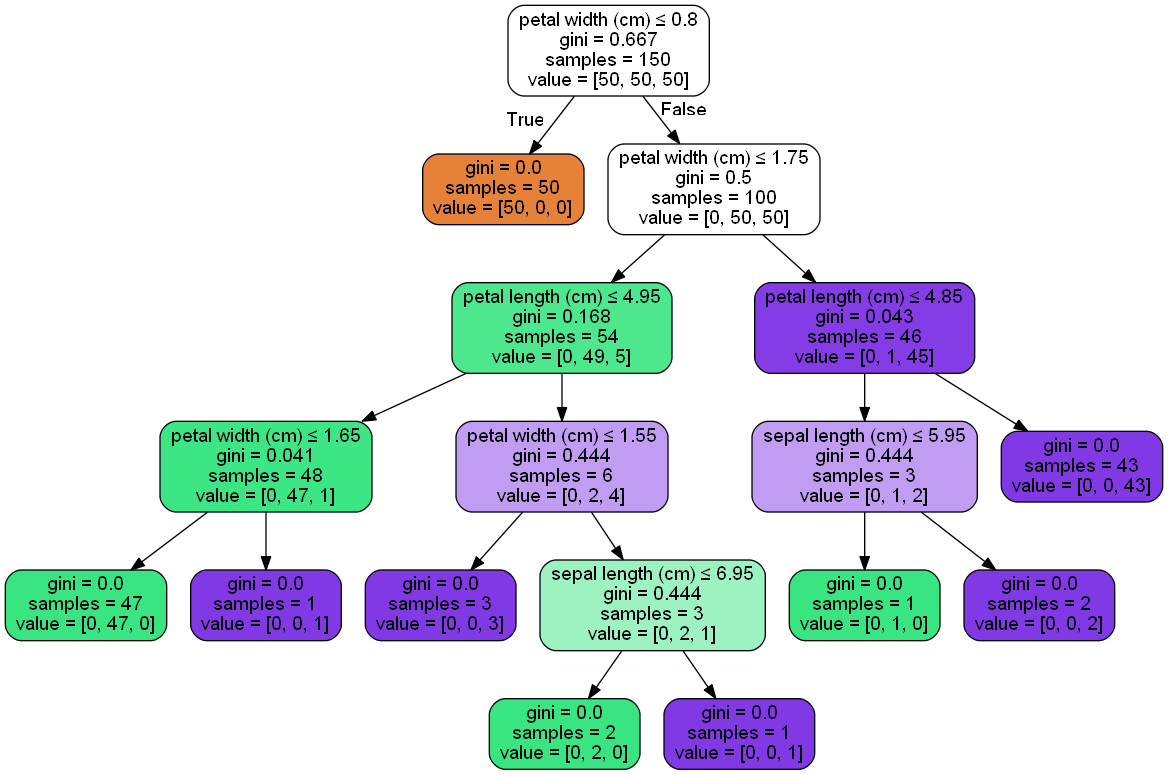

In [25]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from mlxtend.plotting import plot_decision_regions
from sklearn import tree

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree1, out_file=dot_data, feature_names=iris_set.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())